In [ ]:
## POR HACER.
## GRAFICAR LAS SERIES.
### GRAFICOS TENDENCIA
### OTROS GRÁFICOS

## GRAFICAR
### GRAFICAR TENDENCIA DE CADA SERIE

In [1]:
import os
# set path root of repo
actual_path = os.path.abspath(os.getcwd())
list_root_path = actual_path.split('/')[:-1]
root_path = '/'.join(list_root_path)
os.chdir(root_path)
print('root path: ', root_path)

root path:  /Users/joseortega/Documents/GitHub/forecasting-m5-dataset


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import root_mean_squared_error

In [3]:
import warnings
warnings.filterwarnings("ignore")

### 1. Read raw files

In [35]:
folder_data_raw_dtype = 'data/data_input_dtype/'

df_calender = pd.read_pickle(folder_data_raw_dtype + 'calendar.pkl')
df_prices = pd.read_pickle(folder_data_raw_dtype + 'sell_prices.pkl')
df_sales = pd.read_pickle(folder_data_raw_dtype + 'sales_train_evaluation.pkl')
df_sample_output = pd.read_pickle(folder_data_raw_dtype + 'sample_submission.pkl')

In [21]:
df_sales.head(3) # df con las ventas

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0.0,0.0,0.0,0.0,...,2.0,4.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,1.0
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0.0,0.0,0.0,0.0,...,0.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,2.0,3.0,0.0,1.0


### 2. Eliminar columnas no utilizadas para tener dataframe solo con las series

In [22]:
# eliminar columnas no utilizadas
df_sales = df_sales.drop(columns = ['item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'])
df_sales = df_sales.set_index('id')

# transformar todas las columnas que están en formato string a float
# data[data.select_dtypes(include=['object']).columns] = data.select_dtypes(include=['object']).apply(pd.to_numeric, errors='coerce')

In [23]:
df_sales.head(3)

,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
id,,,,,,,,,,,,,,,,,,,,,
HOBBIES_1_001_CA_1_evaluation,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,4.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,1.0
HOBBIES_1_002_CA_1_evaluation,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
HOBBIES_1_003_CA_1_evaluation,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,2.0,3.0,0.0,1.0


### 3. Plotear tendencia - USANDO DATAFRAME DE LA FORMA (serie, timestamp)

In [24]:
# obtener listado de series por volumen. Usar para decidir qué serie plotear
df_sales.sum(axis = 1).sort_values(ascending = False)

id
FOODS_3_090_CA_3_evaluation        253859.0
FOODS_3_586_TX_2_evaluation        195120.0
FOODS_3_586_TX_3_evaluation        151862.0
FOODS_3_586_CA_3_evaluation        136269.0
FOODS_3_090_CA_1_evaluation        128855.0
                                     ...   
HOUSEHOLD_2_216_CA_4_evaluation        23.0
FOODS_2_071_TX_3_evaluation            18.0
HOBBIES_1_170_WI_3_evaluation          16.0
FOODS_2_057_WI_2_evaluation            16.0
FOODS_3_778_CA_2_evaluation            15.0
Length: 30490, dtype: float32

In [25]:
# DEFINIR SERIE A PLOTEAR
id_serie_plot = 'FOODS_3_090_CA_3_evaluation'

In [32]:
# filtrar serie a plotear
serie_plot = df_sales[df_sales.index == id_serie_plot] # filtrar serie
serie_plot = serie_plot.T # traspuesta

In [33]:
serie_plot.head()

id,FOODS_3_090_CA_3_evaluation
d_1,108.0
d_2,132.0
d_3,102.0
d_4,120.0
d_5,106.0


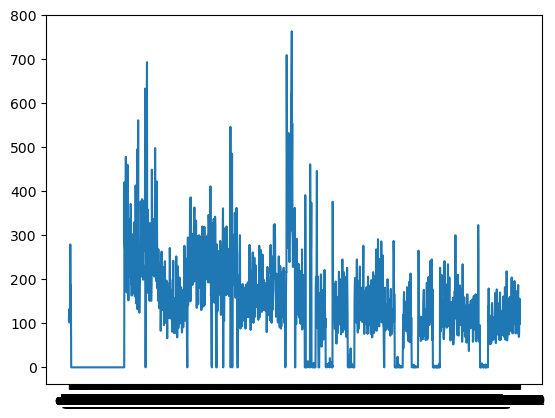

In [34]:
plt.plot(serie_plot)